In [3]:
%pylab inline
import pandas as pd
import dask.dataframe as dd

Populating the interactive namespace from numpy and matplotlib


In [4]:
import dask.array as da
import datetime 
import gc
from multiprocessing import pool
import cPickle as pickle
import os

In [5]:
import geopandas as gpd

In [14]:
sys.path.insert(0,"../python/")
import zillow.features  as features
reload (features)

<module 'zillow.features' from '../python/zillow/features.pyc'>

In [69]:
gdf=   gpd.read_file("../input/third/NC/") 


In [72]:
gdf[gdf.GEOID10=='370079206001096']

STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE10          GEOID10      NAME10  \
6748        37        007    920600      1096  370079206001096  Block 1096   

     MTFCC10 UR10 UACE10 UATYP10 FUNCSTAT10  ALAND10  AWATER10   INTPTLAT10  \
6748   G5040    R   None    None          S   701073         0  +34.8475709   

        INTPTLON10                                           geometry  
6748  -080.1408524  POLYGON ((-80.143593 34.850626, -80.143383 34....

In [12]:
gdf.shape

(710145, 16)

In [22]:
blocks=set(features.get('rawcensustractandblock','06')['rawcensustractandblock'])

In [24]:
tracts={u[:11] for u in blocks}

In [25]:
len( blocks), len(tracts)

(61843, 1530)

In [35]:
gdf['tract']=gdf.GEOID10.map(lambda u: u[:11])

In [62]:
block_df=gdf[gdf.GEOID10.isin(blocks)]
tract_df=gdf[gdf.tract.isin(tracts)]

In [63]:
tract_df=tract_df[['tract','geometry']].dissolve(by='tract')

In [64]:
tract_df.head()

geometry
tract                                                         
06001400100  POLYGON ((-122.244058 37.860702, -122.244065 3...
06001400200  POLYGON ((-122.257078 37.842867, -122.257325 3...
06001400300  POLYGON ((-122.262259 37.837293, -122.262361 3...
06001400400  POLYGON ((-122.257075 37.843608, -122.257337 3...
06001400500  POLYGON ((-122.267004 37.844287, -122.267217 3...

In [68]:
tract_df.shape

(1530, 1)

In [66]:
len(tract_df), len(block_df),len(gdf)

(1530, 61843, 710145)

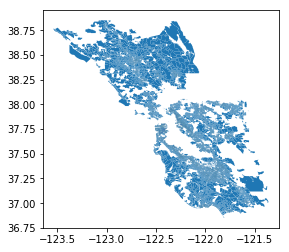

In [29]:
block_df.plot()

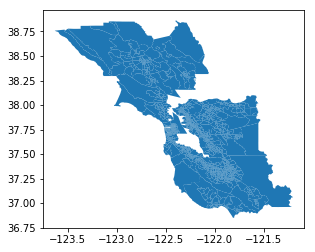

In [67]:
gpd.plotting.plot_series(tract_df.geometry)